Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.2  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić 

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **21. listopada 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%pylab inline


Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matrixom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

X1 = X
y1 = y

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(1)
phi = poly.fit_transform(X)
print(phi)

# Vaš kôd ovdje

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg

In [6]:
pinverse1 = pinv(phi)
pinverse2 = matmul(inv(matmul(transpose(phi), phi)), transpose(phi))

#print(pinverse1)
#print(pinverse2)

w = matmul(pinverse2, y)
print(w)
                   
# Vaš kôd ovdje

[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [7]:
import sklearn.metrics as mt

wt = w #(np.array([w]))

print(wt)
print(phi)

hx = np.dot(phi, w)

E = mt.mean_squared_error(hx, y)
print(E)

# Vaš kôd ovdje

[2.2        0.45714286]
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]
2.042857142857143


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [8]:
# Vaš kôd ovdje

try:
    w = matmul(inv(phi), y)
    print(w)
except LinAlgError as err:
    print("Exception")
    print(err)

Exception
Last 2 dimensions of the array must be square


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [9]:
from sklearn.linear_model import LinearRegression

In [57]:
# Vaš kôd ovdje
lr = LinearRegression().fit(X, y)
#print(lr.score(X, y))
#print(lr.coef_)
#print(lr.intercept_)
print([lr.intercept_, lr.coef_])

print(wt)

pr = lr.predict(X)
E = mt.mean_squared_error(pr, y)
print(E)

[2.2, array([0.45714286])]
[2.2        0.45714286]
2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [11]:
from numpy.random import normal

def make_labels(X, f, noise=0) :
    # Vaš kôd ovdje
    N = numpy.random.normal
    fx = f(X)
    #nois = [N(0, noise) for _ in range(X.shape[0])]
    #print(nois)
    #y = f(X) + nois
    y = [ f(x) + N(0, noise) for x in X ]
    
    return y


In [12]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

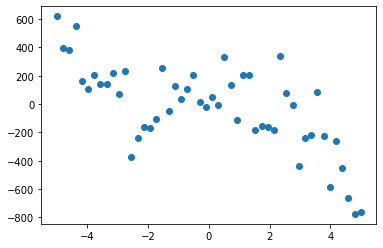

In [68]:
# Vaš kôd ovdje
N = 50
def f(x):
    return 5 + x - 2*x*x - 5*x*x*x
noise = 200

X2 = make_instances(-5, 5, N)
y2 = make_labels(X2, f, noise)

#print(X)
#print(y)

s = scatter(X2, y2)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

d: 3 E: 35034.64170931307


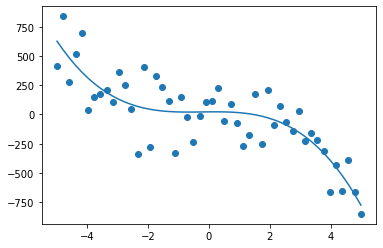

In [14]:
# Vaš kôd ovdje
import sklearn.linear_model as lm

def polyX(d):

    p3 = PolynomialFeatures(d).fit_transform(X2)
    l2 = LinearRegression().fit(p3, y2)
    h2 = l2.predict(p3)

    E = mt.mean_squared_error(h2, y2)
    print('d: ' + str(d) + ' E: ' + str(E))
    #print(p3)
    plot(X2, h2, label = str(d))

scatter(X2, y2)
polyX(3)


### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

d: 1 E: 49009.39447677318
d: 3 E: 35034.64170931307
d: 5 E: 34842.70562523717
d: 10 E: 31867.92127438671
d: 20 E: 22219.251118066426


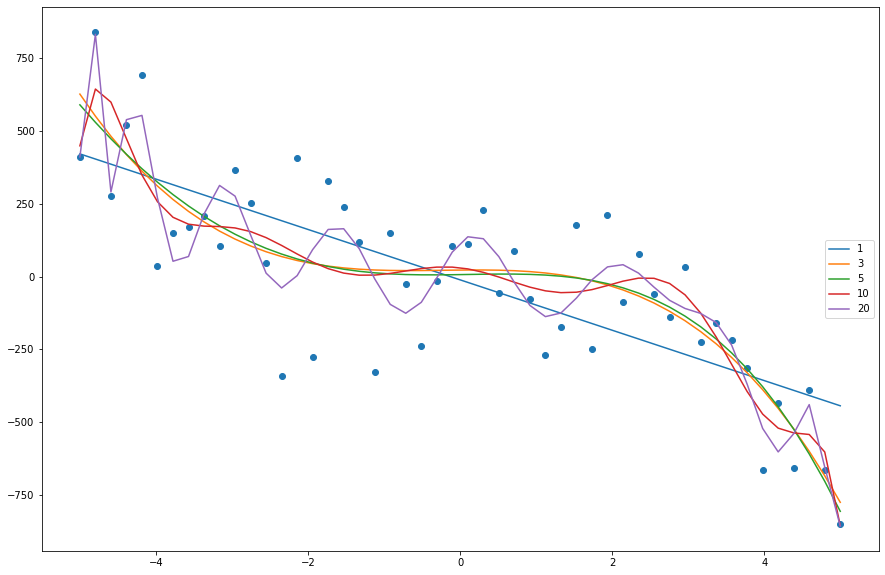

In [15]:
# Vaš kôd ovdje
figure(figsize=(15,10))
scatter(X2, y2)
polyX(1)
polyX(3)
polyX(5)
polyX(10)
polyX(20)

s = plt.legend(loc="center right")



### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [16]:
from sklearn.model_selection import train_test_split

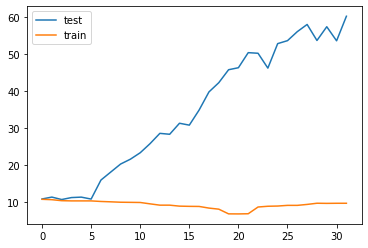

In [66]:
# Vaš kôd ovdje

xTr, xTest, yTr, yTest = train_test_split(X2, y2, test_size=0.5)

testError = []
trainError = []

for d in range(1,33):

    polyXTrain = PolynomialFeatures(d).fit_transform(xTr)    
    polyXTest = PolynomialFeatures(d).fit_transform(xTest)

    l2 = LinearRegression().fit(polyXTrain, yTr)
    h2 = l2.predict(polyXTest)

    E = mt.mean_squared_error(h2, yTest)
    #print('d: ' + str(d) + ' E: ' + str(E))
    testError.append(E)
    
    
    h2 = l2.predict(polyXTrain)

    E = mt.mean_squared_error(h2, yTr)
    #print('d: ' + str(d) + ' E: ' + str(E))
    trainError.append(E)
    #print(p3)
    #plot(polyXTest, h2, label = str(d))

plot(numpy.log(numpy.array(testError)), label='test')
plot(numpy.log(numpy.array(trainError)), label='train')
legend()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za sve kombinacija broja primjera $N\in\{100,200,1000\}$ i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

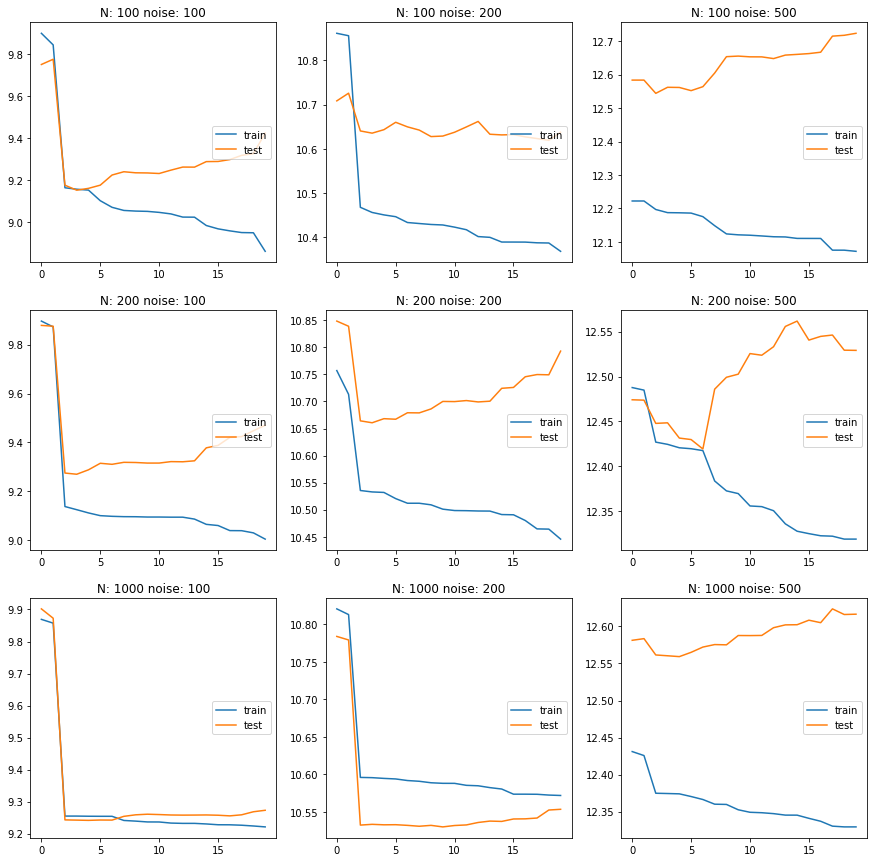

In [67]:
# Vaš kôd ovdje

# Vaš kôd ovdje
figure(figsize=(15,15))

N = 1000
def f(x):
    return 5 + x - 2*x*x - 5*x*x*x

X3 = make_instances(-5, 5, N)

xAllTrain, xAllTest = train_test_split(X3, test_size=0.5)
i = 0
j = 0

for N in [100, 200, 1000]:
    for noise in [100, 200, 500]:
        j += 1
        
        xTrain = xAllTrain[:N]
        xTest = xAllTest[:N]
        yTrain = make_labels(xTrain, f, noise)
        yTest = make_labels(xTest, f, noise)

        trainError = []
        testError = []

        for d in range(1,21):

            polyXTrain = PolynomialFeatures(d).fit_transform(xTrain)    
            polyXTest = PolynomialFeatures(d).fit_transform(xTest)

            l2 = LinearRegression().fit(polyXTrain, yTrain)
            h2 = l2.predict(polyXTest)

            testE = mt.mean_squared_error(h2, yTest)
            testError.append(testE)
            
            h2 = l2.predict(polyXTrain)
            trainE = mt.mean_squared_error(h2, yTrain)
            trainError.append(trainE)
            #print('d: ' + str(d) + ' E: ' + str(E))
            #print(p3)
            #plot(polyXTest, h2, label = str(d))

        subplot(3,3,j, title = "N: " + str(N) + " noise: " + str(noise))
        plot(numpy.log(numpy.array(trainError)), label = 'train')        
        plot(numpy.log(numpy.array(testError)), label = 'test')
        plt.legend(loc="center right")
        




#print(X)
#print(y)

#s = scatter(X2, y2)

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [19]:
# Vaš kôd ovdje
phi4 = PolynomialFeatures(3).fit_transform(X1)

def reg2(lambd):
    w = matmul( matmul(inv( matmul(transpose(phi4), phi4) + lambd * identity(len(phi4))), transpose(phi4)), y1)
    print(w)
    
reg2(0)
reg2(1)
reg2(10)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
[0.43312265 0.11060671 0.13827839 0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [20]:

from sklearn.linear_model import Ridge

In [21]:
#for s in ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']:
for l in [0, 1, 10]:

    r = Ridge(l, fit_intercept = False).fit(phi4, y1)
    print(r.coef_)
    print(r.intercept_)

    # Vaš kôd ovdje

[ 4.         -5.91666667  3.375      -0.45833333]
0.0
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
0.0
[0.43312265 0.11060671 0.13827839 0.03093411]
0.0


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

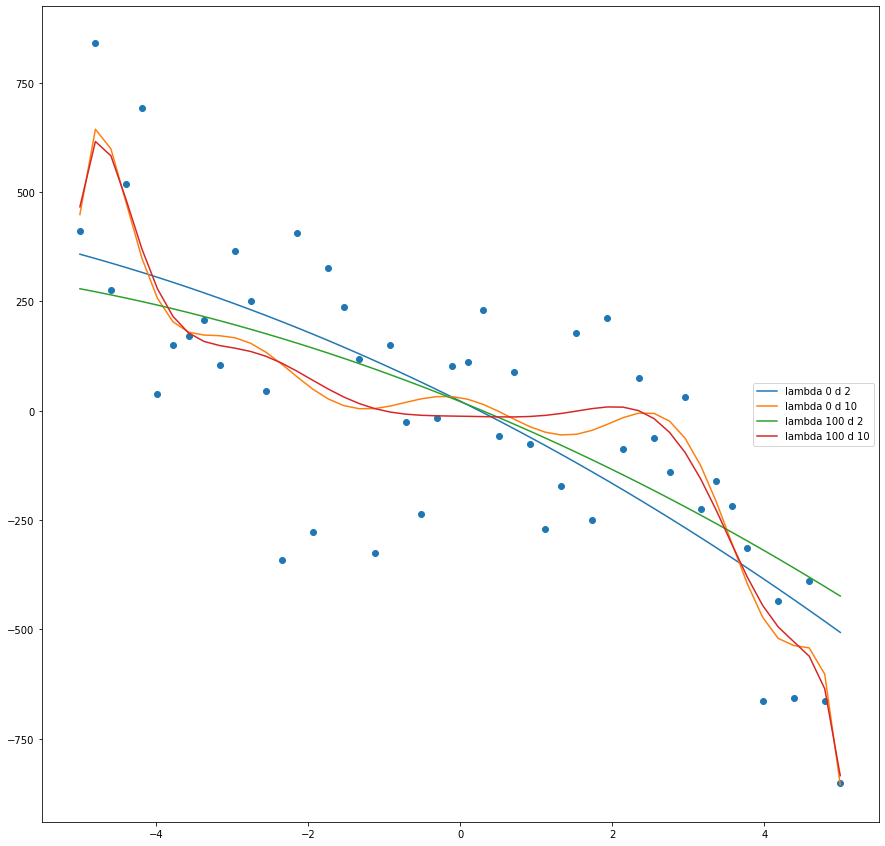

In [22]:
# Vaš kôd ovdje

N = 50

figure(figsize = (15, 15))
x123 = scatter(X2, y2)

for lambd in [0, 100]:
    for d in [2, 10]:
        phi2 = PolynomialFeatures(d).fit_transform(X2)
        r = Ridge(lambd).fit(phi2, y2)
        h2 = r.predict(phi2)
        #print(d)
        plot(X2, h2, label="lambda " + str(lambd) + " d " + str(d))
        
x321 = plt.legend(loc="center right")


### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


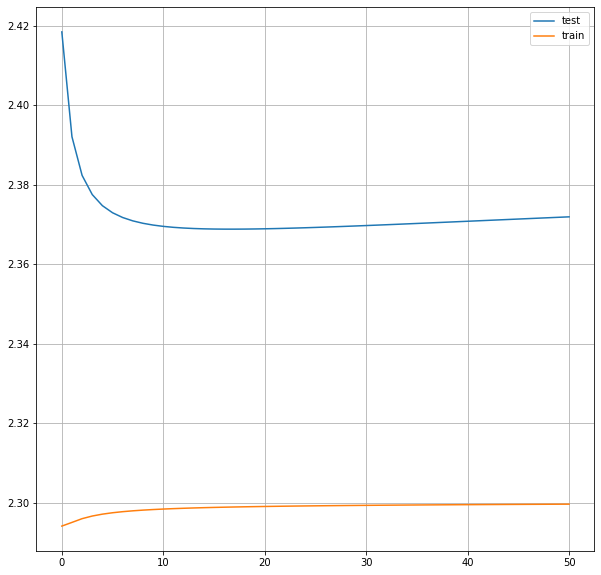

In [92]:
# Vaš kôd ovdje


xTr, xTest, yTr, yTest = train_test_split(X2, y2, test_size=0.5)
figure(figsize=(10,10))
trainError = []
testError = []

#print(xTr)

for lambd in range(0,51):

    polyXTrain = PolynomialFeatures(10).fit_transform(xTr)    
    polyXTest = PolynomialFeatures(10).fit_transform(xTest)

    l2 = Ridge(lambd).fit(polyXTrain, yTr)
    h2 = l2.predict(polyXTest)

    E = mt.mean_squared_error(h2, yTest)
    #print('d: ' + str(d) + ' E: ' + str(E))
    testError.append(log( E))
    
    h2 = l2.predict(polyXTrain)
    E = mt.mean_squared_error(h2, yTr)
    trainError.append(log(E))
    #print(p3)
    #plot(polyXTest, h2, label = str(d))
#print(numpy.log(numpy.array(testError)))
plot(numpy.log(numpy.array(testError)), label="test")
plot(numpy.log(numpy.array(trainError)), label="train")
grid()
legend()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [24]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=10$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

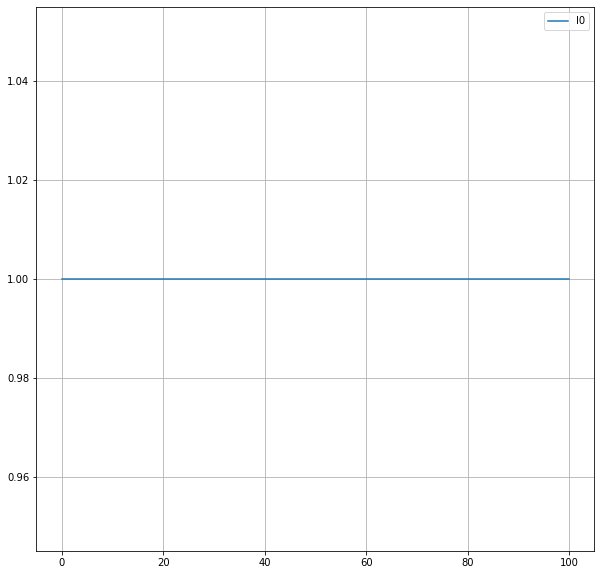

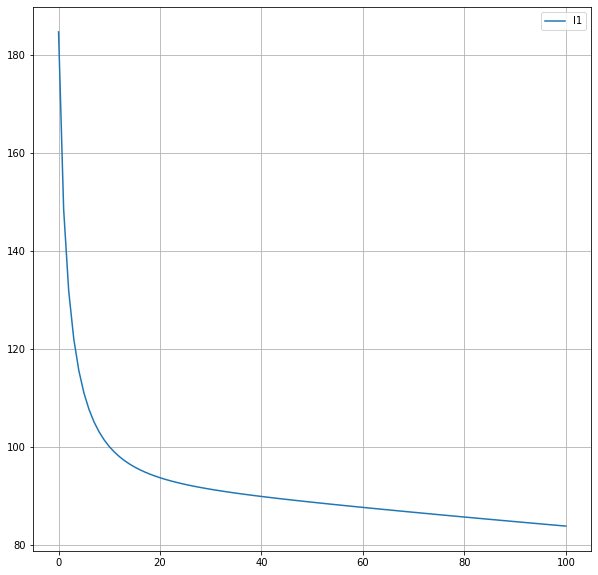

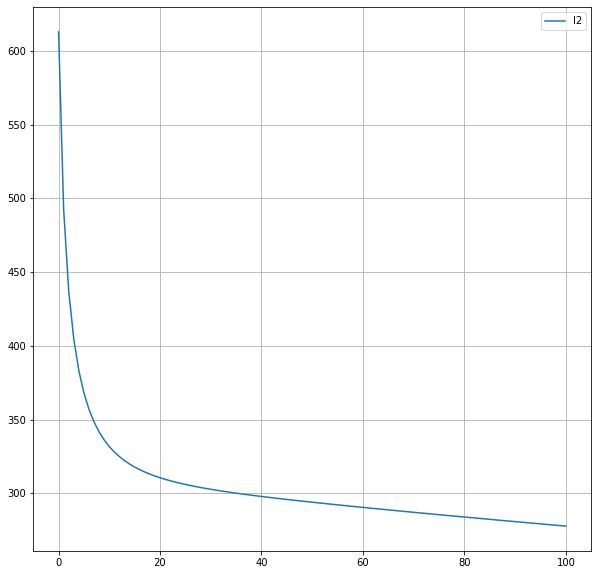

In [94]:
# Vaš kôd ovdje
d = 10

l0 = []
l1 = []
l2 = []


xTr, xTest, yTr, yTest = train_test_split(X2, y2, test_size=0.5)

for lambd in range(0,101):

    polyXTrain = PolynomialFeatures(10).fit_transform(xTr)    
    polyXTest = PolynomialFeatures(10).fit_transform(xTest)

    r = Ridge(lambd).fit(polyXTrain, yTr)
    
    r.coef_[0] = r.intercept_
    
    l0.append(nonzeroes(r.coef_))
    #print(r.coef_)
    l1.append(numpy.linalg.norm(r.coef_, ord=1))
    l2.append(numpy.linalg.norm(r.coef_, ord=2))
    

figure(figsize=(10,10))
plot(l0, label="l0")
legend()
grid()

figure(figsize=(10,10))
plot(l1, label="l1")
legend()
grid()

figure(figsize=(10,10))
plot(l2, label="l2")
legend()
grid()


### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Zanemarite upozorenja.

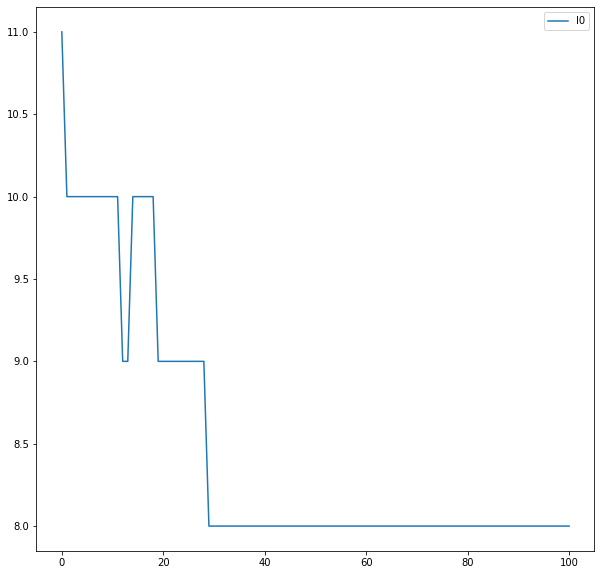

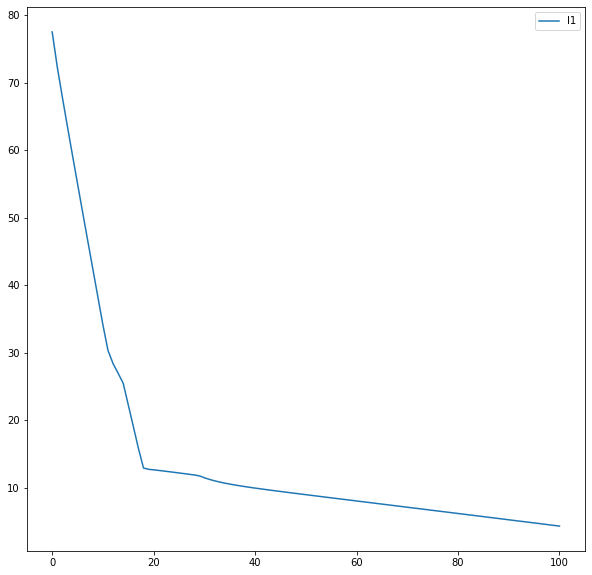

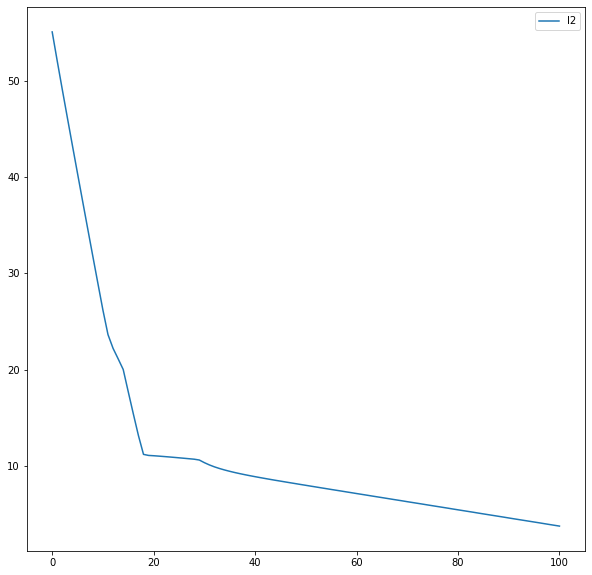

In [26]:
# Vaš kôd ovdje
d = 10

l0 = []
l1 = []
l2 = []


xTr, xTest, yTr, yTest = train_test_split(X2, y2, test_size=0.5)

for lambd in range(0,101):

    polyXTrain = PolynomialFeatures(10).fit_transform(xTr)    
    polyXTest = PolynomialFeatures(10).fit_transform(xTest)

    r = sklearn.linear_model.Lasso(lambd).fit(polyXTrain, yTr)
    
    r.coef_[0] = r.intercept_
    
    l0.append(nonzeroes(r.coef_))
    #print(r.coef_)
    l1.append(numpy.linalg.norm(r.coef_, ord=1))
    l2.append(numpy.linalg.norm(r.coef_, ord=2))
    

figure(figsize=(10,10))
plot(l0, label="l0")
legend()

figure(figsize=(10,10))
plot(l1, label="l1")
legend()

figure(figsize=(10,10))
plot(l2, label="l2")
legend()

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [27]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)** Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

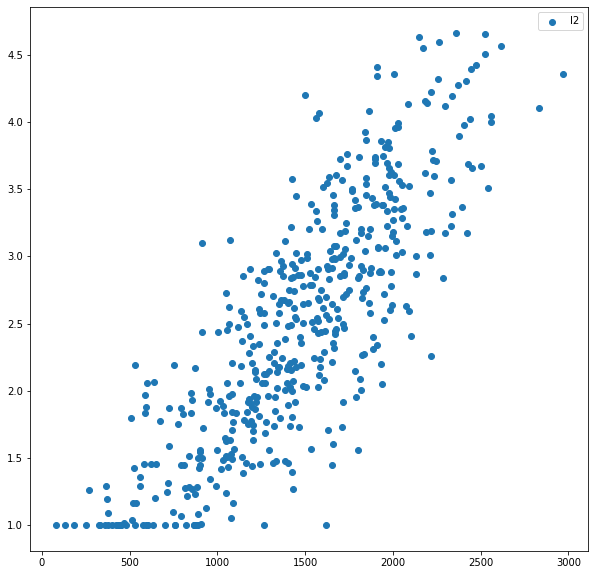

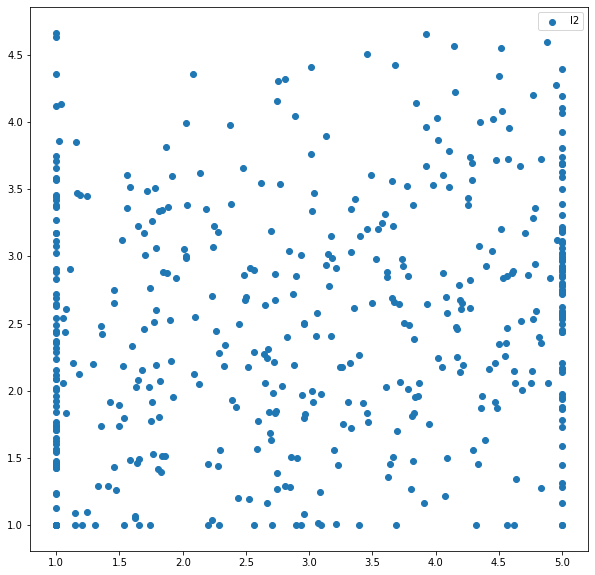

In [28]:
# Vaš kôd ovdje

figure(figsize=(10,10))
scatter(exam_score, grades_y, label="l2")
legend()

figure(figsize=(10,10))
scatter(grade_in_highschool, grades_y, label="l2")
legend()

**b)** Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [29]:
# Vaš kôd ovdje
r7b = Ridge(0.01).fit(grades_X, grades_y)
h2 = r7b.predict(grades_X)
E = mt.mean_squared_error(h2, grades_y)
print(E)

0.23990435033172805


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
# Vaš kôd ovdje
ssX = StandardScaler().fit_transform(grades_X)
ssY = StandardScaler().fit_transform(grades_y.reshape(-1, 1))
r = Ridge(0.01).fit(ssX, ssY)
h2 = r.predict(ssX)
E = mt.mean_squared_error(h2, ssY)
print(E)

0.29228757017069595


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)** Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [32]:
# Vaš kôd ovdje
grades_X_fixed_colinear = [ [x[0], x[1], x[1]] for x in ssX]
#print(grades_X_fixed_colinear)

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [33]:
# Vaš kôd ovdje
r8a = Ridge(0.01).fit(grades_X_fixed_colinear, ssY)
h2 = r8a.predict(grades_X_fixed_colinear)
E = mt.mean_squared_error(h2, ssY)
print(E)

print(r7b.coef_)
print(r8a.coef_)

0.29228757016744167
[0.00141497 0.09477276]
[[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)** Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [44]:
# Vaš kôd ovdje

for lambd in [0.01, 1000]:
    print(lambd)
    ws1 = []
    ws2 = []
    ws3 = []
    for i in range(10):
    
        xTrain, xTest, yTrain, yTest = train_test_split(grades_X_fixed_colinear, ssY, test_size=0.5)


        print(l2.coef_)
        l2 = Ridge(lambd).fit(xTrain, yTrain)
        ws1.append(l2.coef_[0][0])
        ws2.append(l2.coef_[0][1])
        ws3.append(l2.coef_[0][2])
        
    print("std dev: " + str(np.std(ws1)))
    print("std dev: " + str(np.std(ws2)))
    print("std dev: " + str(np.std(ws3)))



0.01
[[0.17218748 0.0344923  0.0344923 ]]
[[0.84246666 0.09315474 0.09315474]]
[[0.83286598 0.08765148 0.08765148]]
[[0.81458001 0.07866862 0.07866862]]
[[0.82517196 0.06938981 0.06938981]]
[[0.85269402 0.06949126 0.06949126]]
[[0.80969318 0.10875278 0.10875278]]
[[0.81699674 0.10298575 0.10298575]]
[[0.81433393 0.07079685 0.07079685]]
[[0.80682267 0.0727553  0.0727553 ]]
std dev: 0.014271521975110736
std dev: 0.013658056120542186
std dev: 0.013658056120927404
1000
[[0.81569362 0.09061742 0.09061742]]
[[0.16330931 0.03013155 0.03013155]]
[[0.16935598 0.02380326 0.02380326]]
[[0.16539311 0.0418387  0.0418387 ]]
[[0.16436411 0.0291035  0.0291035 ]]
[[0.15831992 0.02629894 0.02629894]]
[[0.17127089 0.02865306 0.02865306]]
[[0.16408252 0.02886417 0.02886417]]
[[0.16734489 0.03691483 0.03691483]]
[[0.16781485 0.03175941 0.03175941]]
std dev: 0.0034607121389099342
std dev: 0.005219277592408069
std dev: 0.005219277592408063


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)** Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_X_fixed_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.


In [55]:
# Vaš kôd ovdje
#print(grades_X_fixed_colinear)
for l in [0.01, 10]:
    #print(l * identity(len(grades_X_fixed_colinear)))
    mm = matmul(transpose(grades_X_fixed_colinear), grades_X_fixed_colinear)
    matr = mm + l * identity(len(mm))
    print(matr)
    print(np.linalg.cond(matr))

[[500.01        37.00469301  37.00469301]
 [ 37.00469301 500.01       500.        ]
 [ 37.00469301 500.         500.01      ]]
100542.86653460482
[[510.          37.00469301  37.00469301]
 [ 37.00469301 510.         500.        ]
 [ 37.00469301 500.         510.        ]]
101.54186653499362


**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  